# Demography inference
Here we infer a 2-epoch piece-wise constant demography using the SFS. We parametrize the demography by the time of the first population size change and its new population size, starting with ``Ne = 1`` at time 0. For the optimization to work, we specify parameter bounds, a loss function, and the coalescent distribution object in question constructed from the given parameters. We use an SFS with 10 samples, and a Poisson likelihood as loss function.

In [1]:
import phasegen as pg

# observed SFS
observed = pg.SFS([177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 652])

# create inference object
inf = pg.Inference(
    x0=dict(t=1, Ne=1),
    bounds=dict(t=(0, 4), Ne=(0.1, 1)),
    dist=lambda t, Ne: (
        pg.PiecewiseTimeHomogeneousCoalescent(
            n=10,
            demography=pg.PiecewiseTimeHomogeneousDemography(
                pop_sizes=[1, Ne],
                times=[0, t]
            ),
            pbar=False,
            parallelize=False
        )
    ),
    loss=lambda dist: (
        pg.PoissonLikelihood().compute(
            observed=observed.normalize().polymorphic,
            modelled=dist.sfs.mean.normalize().polymorphic
        )
    )
)

# perform inference
inf.run()

print(inf.result)

Optimizing loss function: 57it [00:00, 78.60it/s]

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 2.3783845139077373
        x: [ 1.454e-01  4.813e-01]
      nit: 10
      jac: [-1.688e-06 -2.398e-06]
     nfev: 63
     njev: 21
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


We can now visualize the modelled and observed SFS. The coalescent distribution with the lowest loss can be accessed as ``dist_inferred``.

<Figure size 512x384 with 0 Axes>

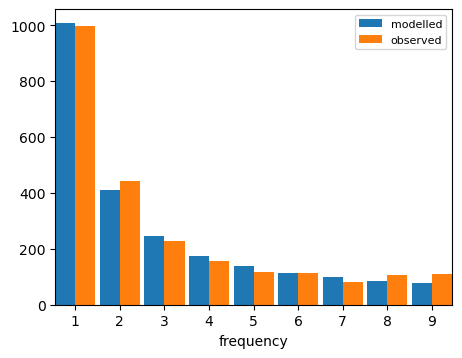

In [2]:
import fastdfe as fd

s = fd.Spectra.from_spectra(dict(
    modelled=inf.dist_inferred.sfs.mean.normalize() * observed.n_polymorphic,
    observed=observed
))

s.plot();

We can also plot to the population size trajectory of our MLE estimate.

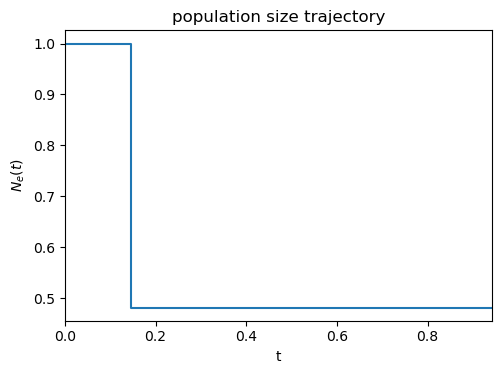

In [3]:
inf.dist_inferred.demography.plot(t_max=inf.dist_inferred.tree_height.mean);